## Position
After analysing some general properties about the text of the guiding principles, we will now have a closer look at their position in the text.

In [1]:
import sys
sys.path.append("..")
import os
from pathlib import Path
import io
import json

from tqdm import tqdm

from dataloading import get_ext_target_indices
from preprocessing import Tokenizer

In [2]:
tok = Tokenizer(Path("..")/".."/"model")
DATA_PATH = Path("..")/".."/"data"/"dataset"
DB_PATH = Path("..")/".."/"data"/"databases"/"extractive.db"

In [3]:
segment_len = []
indices = []
for file in tqdm(os.listdir(DATA_PATH)):
    with io.open(DATA_PATH/file, "r", encoding="utf-8") as f:
        verdict = json.load(f)
    segment_len.append((len(verdict["facts"]), len(verdict["reasoning"])))
    indices.append(get_ext_target_indices(DATA_PATH/file, DB_PATH, tok))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100018/100018 [01:06<00:00, 1498.65it/s]


### Statistics

In [4]:
f_percentages = []
r_percentages = []
for l, ind in zip(segment_len, indices):
    f, r = l
    f_inds, r_inds = ind
    f_inds = [i/f for i in f_inds]
    f_percentages.append(f_inds)
    r_inds = [i/r for i in r_inds]
    r_percentages.append(r_inds)

In [5]:
import numpy as np
from functools import reduce

f_list = []
for f in f_percentages:
    f_list.extend(f)
r_list = []
for r in r_percentages:
    r_list.extend(r)

f = np.array(f_list)
r = np.array(r_list)

In [6]:
print("Golden labels from facts:", f.shape[0])
print("Golden labels from reasoning:", r.shape[0])

Golden labels from facts: 21378
Golden labels from reasoning: 269349


Text(0.5, 1.0, 'Relative position of Gold Labels in facts')

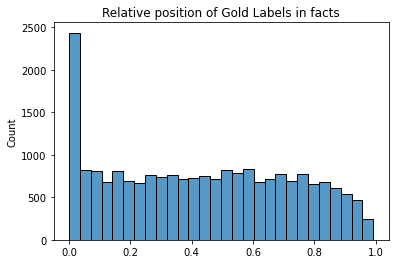

In [7]:
import seaborn as sns
ax = sns.histplot(x=f)
ax.set_title("Relative position of Gold Labels in facts")

Text(0.5, 1.0, 'Relative position of Gold Labels in reasoning')

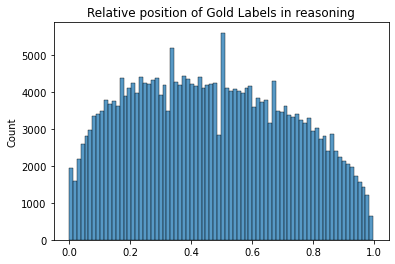

In [8]:
ax = sns.histplot(x=r)
ax.set_title("Relative position of Gold Labels in reasoning")

Cumulative density plot of relative position of gold labels


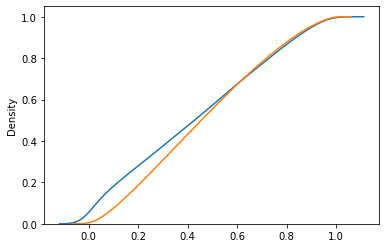

In [9]:
sns.kdeplot(x=f, cumulative=True)
sns.kdeplot(x=r, cumulative=True)
print("Cumulative density plot of relative position of gold labels")

In [10]:
f_avg = list(map(lambda perc: sum(perc)/len(perc) if len(perc) > 0 else 0.5, f_percentages))
r_avg = list(map(lambda perc: sum(perc)/len(perc) if len(perc) > 0 else 0.5, r_percentages))

In [11]:
f_len = np.array([f_avg, list(map(lambda x: x[0], segment_len))])
r_len = np.array([r_avg, list(map(lambda x: x[1], segment_len))])

Length document against average relative position


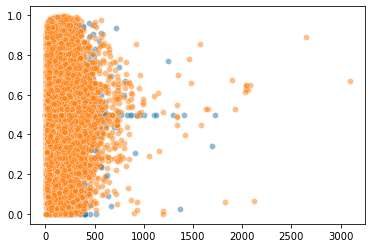

In [12]:
sns.scatterplot(x=f_len[1],y=f_len[0],alpha=0.5)
sns.scatterplot(x=r_len[1],y=r_len[0],alpha=0.5)
print("Length document against average relative position")

### Absolut Position

In [13]:
f_absolut = []
r_absolut = []
for ind in indices:
    f_inds, r_inds = ind
    f_inds = [i for i in f_inds]
    f_absolut.append(f_inds)
    r_inds = [i for i in r_inds]
    r_absolut.append(r_inds)

In [14]:
f_list = []
for f in f_absolut:
    for x in f:
        f_list.append(x)
r_list = []
for r in r_absolut:
    for x in r:
        r_list.append(x)

f = np.array(f_list)
r = np.array(r_list)

Text(0.5, 1.0, 'Absolut position of Gold Labels in facts')

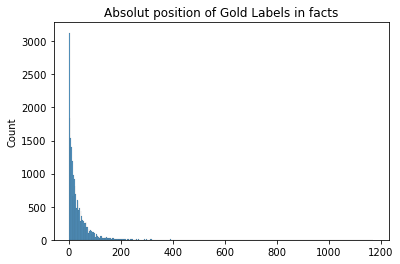

In [15]:
ax = sns.histplot(x=f)
ax.set_title("Absolut position of Gold Labels in facts")

Text(0.5, 1.0, 'Relative position of Gold Labels in reasoning')

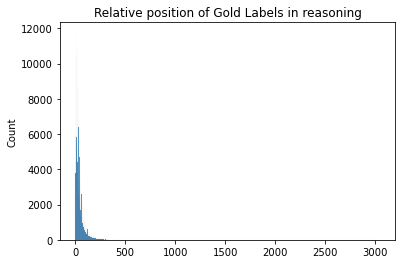

In [16]:
ax = sns.histplot(x=r)
ax.set_title("Relative position of Gold Labels in reasoning")

## Length of Gold Labels

In [6]:
gold_length = []
nums = []
for file in tqdm(os.listdir(DATA_PATH)):
    verdict = tok.tokenize_verdict(DATA_PATH/file)
    f_inds, r_inds = get_ext_target_indices(DATA_PATH/file, DB_PATH, tok)
    nums.append(len(f_inds)+len(r_inds))
    sentences = []
    for ind in f_inds:
        sentences += verdict["facts"][ind]
    for ind in r_inds:
        sentences += verdict["reasoning"][ind]
    gold_length.append(len(sentences))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100018/100018 [24:03<00:00, 69.30it/s]


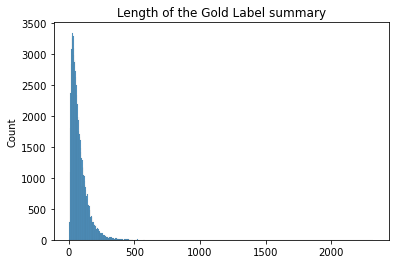

In [8]:
import seaborn as sns
ax = sns.histplot(x=gold_length)
_ = ax.set_title("Length of the Gold Label summary")

In [11]:
print("Gold Summary Lenghts Min:", min(gold_length), "; Max:", max(gold_length), "; Avg:", sum(gold_length)/len(gold_length))

Gold Summary Lenghts Min: 1 ; Max: 2321 ; Avg: 78.26452238597052


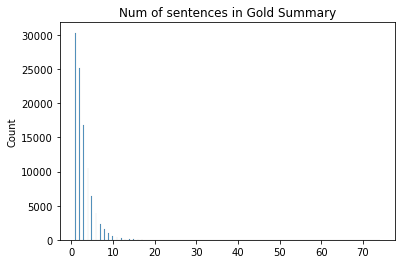

In [12]:
ax = sns.histplot(x=nums)
_ = ax.set_title("Num of sentences in Gold Summary")

In [13]:
print("Sentences Gold Summary Min:", min(nums), "; Max:", max(nums), "; Avg:", sum(nums)/len(nums))

Sentences Gold Summary Min: 1 ; Max: 74 ; Avg: 2.906746785578596
